<a href="https://colab.research.google.com/github/lorenzodemiri/experimentalRLStocks/blob/main/RL_stock_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5 MB 5.1 kB/s 
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 240 kB 47.2 MB/s 
     |████████████████████████████████| 171 kB 58.8 MB/s 
     |████████████████████████████████| 3.8 MB 32.4 MB/s 
     |████████████████████████████████| 503 kB 64.2 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=7215d4e3c1d5f55c366eb41d928986b15b25fbeee1d454695234110c372995da
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorb

In [2]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 161 kB 23.2 MB/s 
     |████████████████████████████████| 5.6 MB 35.4 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.6.0 which is incompatible.
tensorflow-gpu 1.15.0 requires tensorboard<1.16.0,>=1.15.0, but you have tensorboard 2.6.0 which is incompatible.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [3]:
!pip install finta

In [4]:

# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C, PPO2

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Adding Custom indicator
from finta import TA
from gym_anytrading.envs import StocksEnv


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# DATA IMPORT 

In [44]:
df = pd.read_csv("/content/sample_data/AAPL.csv")

In [45]:
df.Date = pd.to_datetime(df.Date)

In [46]:
df.set_index("Date", inplace = True)

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.505716,85812400
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.702660,115117200
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.742523,97433600
2016-10-10,28.754999,29.187500,28.680000,29.012501,27.209095,144944000
2016-10-11,29.424999,29.672501,29.049999,29.075001,27.267710,256164000


In [48]:
df['SMA05'] = TA.SMA(df, 5)
df['SMA15'] = TA.SMA(df, 15)
df['SMA45'] = TA.SMA(df, 45)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df = pd.concat([df, 
                TA.BBANDS(df),
                TA.MACD(df) 
                ], axis = 1)
df

,Open,High,Low,Close,Adj Close,Volume,SMA05,SMA15,SMA45,RSI,OBV,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,SIGNAL
Date,,,,,,,,,,,,,,,,
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.505716,85812400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.702660,115117200,NaN,NaN,NaN,100.000000,1.151172e+08,NaN,NaN,NaN,0.004712,0.002618
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.742523,97433600,NaN,NaN,NaN,100.000000,2.125508e+08,NaN,NaN,NaN,0.007321,0.004545
2016-10-10,28.754999,29.187500,28.680000,29.012501,27.209095,144944000,NaN,NaN,NaN,100.000000,3.574948e+08,NaN,NaN,NaN,0.026291,0.011912
2016-10-11,29.424999,29.672501,29.049999,29.075001,27.267710,256164000,28.667500,NaN,NaN,100.000000,6.136588e+08,NaN,NaN,NaN,0.038532,0.019831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.910004,108972300,145.376001,147.530000,148.294667,36.500707,5.500622e+09,157.704282,149.0965,140.488717,-1.233866,-0.432709
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002,74602000,144.772000,146.711333,148.207111,39.182467,5.575224e+09,157.587159,148.6465,139.705840,-1.419307,-0.630028
2021-09-30,143.660004,144.380005,141.279999,141.500000,141.500000,88934200,143.706000,145.873333,148.129778,36.765130,5.486290e+09,157.384113,148.0960,138.807887,-1.654519,-0.834926


In [49]:
df.fillna(0,inplace= True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA05,SMA15,SMA45,RSI,OBV,BB_UPPER,BB_MIDDLE,BB_LOWER,MACD,SIGNAL
Date,,,,,,,,,,,,,,,,
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.910004,108972300,145.376001,147.530000,148.294667,36.500707,5.500622e+09,157.704282,149.0965,140.488717,-1.233866,-0.432709
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002,74602000,144.772000,146.711333,148.207111,39.182467,5.575224e+09,157.587159,148.6465,139.705840,-1.419307,-0.630028
2021-09-30,143.660004,144.380005,141.279999,141.500000,141.500000,88934200,143.706000,145.873333,148.129778,36.765130,5.486290e+09,157.384113,148.0960,138.807887,-1.654519,-0.834926
2021-10-01,141.899994,142.919998,139.119995,142.649994,142.649994,89362470,142.851999,145.451999,148.063333,40.200481,5.575652e+09,156.751720,147.5460,138.340280,-1.728209,-1.013583
2021-10-04,141.759995,142.210007,138.270004,139.139999,139.139999,98078066,141.606000,144.757999,147.914000,34.109522,5.477574e+09,156.147409,146.7880,137.428590,-2.046248,-1.220116


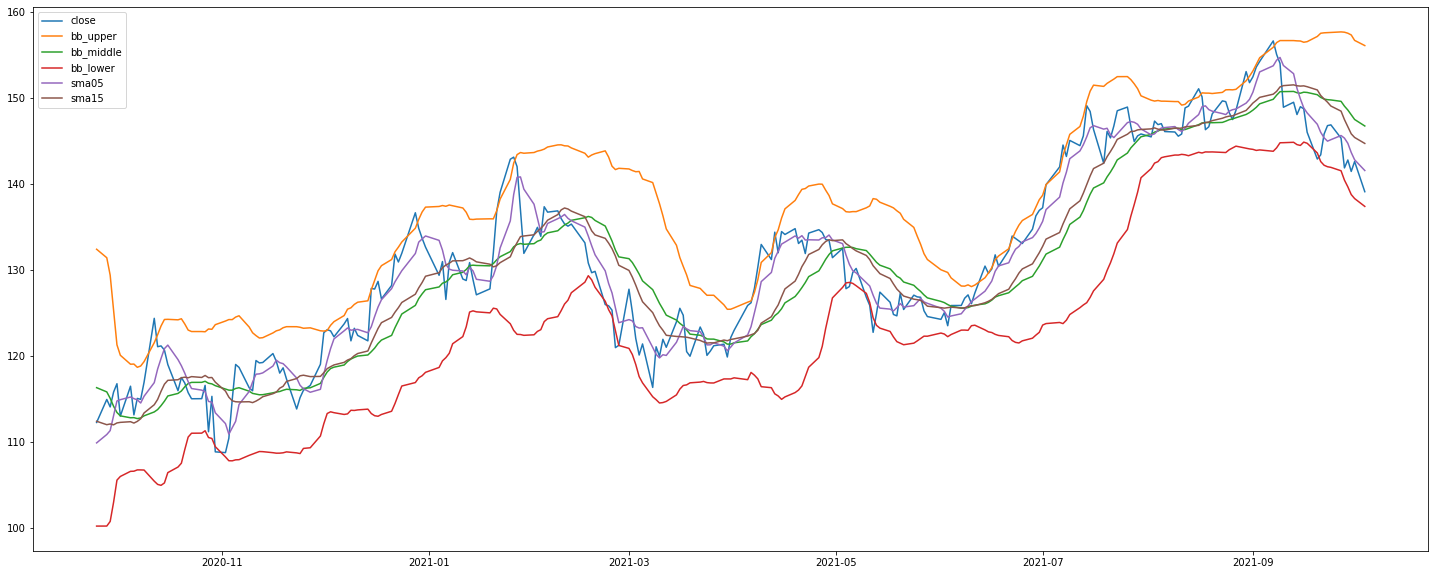

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(df.Close.iloc[1000:1500], label = "close")
plt.plot(df.BB_UPPER.iloc[1000:1500], label = "bb_upper")
plt.plot(df.BB_MIDDLE.iloc[1000:1500], label = "bb_middle")
plt.plot(df.BB_LOWER.iloc[1000:1500], label = "bb_lower")

plt.plot(df.SMA05.iloc[1000:1500], label = "sma05")
plt.plot(df.SMA15.iloc[1000:1500], label = "sma15")

plt.legend()
plt.show()

In [99]:
def add_signals(env):
  start = env.frame_bound[0]
  end = env.frame_bound[1]
  prices = env.df.loc[: , "Low"].to_numpy()[start:end]
  signal_features = env.df.loc[: , ['Low', 'Volume','SMA05','SMA15','SMA45','RSI', 'OBV','BB_UPPER','BB_MIDDLE','BB_LOWER','MACD', 'SIGNAL']].to_numpy()[start:end]
  return prices, signal_features

In [100]:
class MyCustEnv(StocksEnv):
  _process_data = add_signals

env2 = MyCustEnv(df = df, window_size = 15, frame_bound = (15, 100))

In [101]:
env2.signal_features[0]

array([2.83274990e+01, 2.64536800e+08, 2.92574996e+01, 2.91590000e+01,
       0.00000000e+00, 5.00704701e+01, 3.25853200e+08, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.65113083e-02, 6.30004885e-02])

# BUILD ENVIROMENT

In [ ]:
env = gym.make("stocks-v0", df = df, frame_bound = (1,2000), window_size = 5)

In [62]:
env2.action_space

Discrete(2)

In [80]:
state = env2.reset()
while True:
  action = env2.action_space.sample()
  n_state, reward, done, info = env2.step(action)
  if done:
    print("Info", info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env2.render_all()
plt.show()

TypeError: ignored

# BUILD ENVIROMENT AND TRAIN

In [63]:
env_maker = lambda : gym.make("stocks-v0", df = df, frame_bound = (100,1500), window_size = 5)
env = DummyVecEnv([env_maker])

In [102]:
env_maker2 = lambda : env2
env2 = DummyVecEnv([env_maker2])

In [103]:
model = A2C("MlpLstmPolicy", env2, verbose=1)

In [104]:
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.241    |
| fps                | 14       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.135    |
---------------------------------
---------------------------------
| explained_variance | 0.0678   |
| fps                | 278      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.43     |
---------------------------------
---------------------------------
| explained_variance | 0.226    |
| fps                | 312      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 0.0542   |
---------------------------------
---------------------------------
| explained_variance | -0.103   |
| fps                | 332      |
| nupdates           | 300      |
| policy_entropy     | 0.692    |
| total_timest

# EVALAUTION 

In [110]:
env = MyCustEnv(df=df, frame_bound = (700,800), window_size = 15)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 1.7724919999999784, 'total_profit': 0.7840800279285433, 'position': 0}


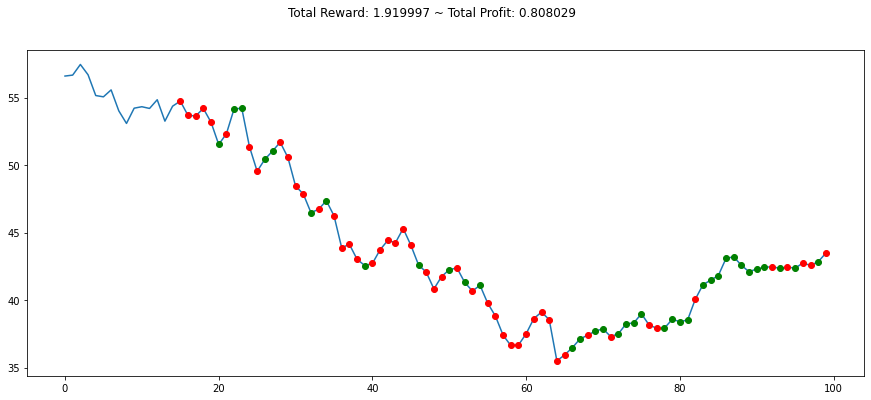

In [108]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()